In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# data = np.array(data)
# m, n = data.shape
# np.random.shuffle(data)

# data_dev =data[0:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]


# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
X_train[0].shape

(41000,)

In [7]:
Y_train

array([7, 6, 8, ..., 9, 2, 7])

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [10]:
W1, b1, W2, b2  = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 2 5 ... 5 2 2] [7 6 8 ... 9 2 7]
accuracy:  0.09658536585365854
Iteration:  100
[9 2 5 ... 9 6 7] [7 6 8 ... 9 2 7]
accuracy:  0.6071707317073171
Iteration:  200
[9 6 8 ... 9 6 7] [7 6 8 ... 9 2 7]
accuracy:  0.7581951219512195
Iteration:  300
[9 6 8 ... 9 2 7] [7 6 8 ... 9 2 7]
accuracy:  0.8119756097560976
Iteration:  400
[9 6 8 ... 9 2 7] [7 6 8 ... 9 2 7]
accuracy:  0.8372926829268292


In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [9]
Label:  7


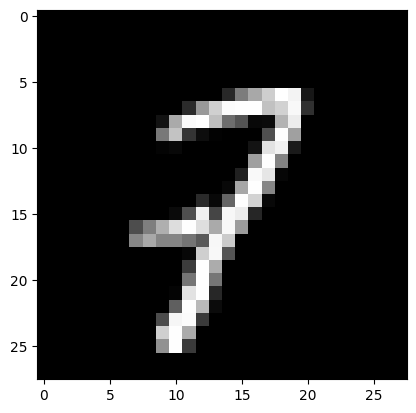

In [12]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


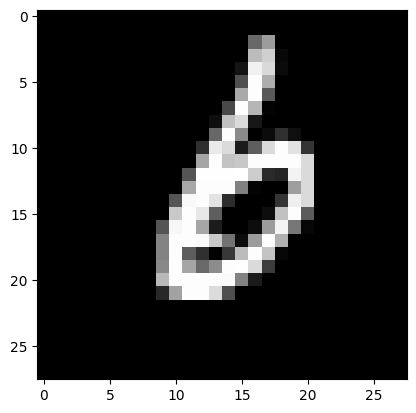

In [13]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [8]
Label:  8


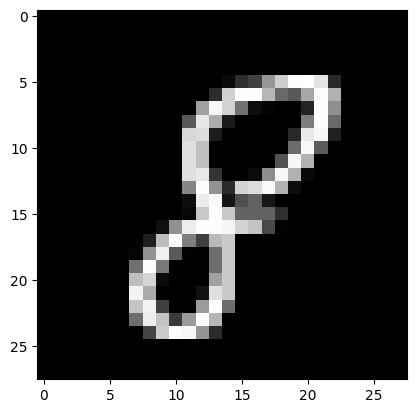

In [14]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [1]
Label:  1


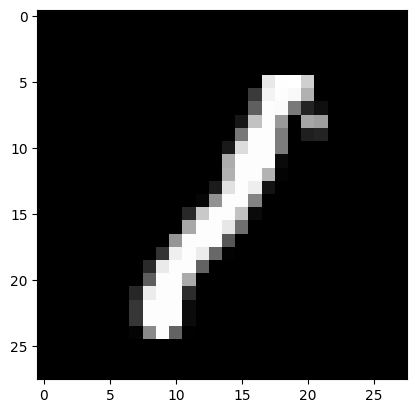

In [15]:
test_prediction(3, W1, b1, W2, b2)
# test_prediction(4, W1, b1, W2, b2)
# test_prediction(5, W1, b1, W2, b2)

In [16]:
test_predictions = make_predictions(X_dev, W1, b1, W2, b2)
# predictions = get_predictions(A2)
print("accuracy: ", get_accuracy(test_predictions, Y_dev))


[6 8 6 7 8 0 8 0 9 1 0 7 0 7 4 6 2 3 5 3 5 8 3 6 1 0 1 2 7 9 3 8 1 4 9 4 8
 3 2 2 5 6 3 3 3 9 0 2 4 4 6 3 6 1 4 6 7 9 9 3 3 7 0 3 0 4 0 0 9 8 8 6 9 3
 5 0 5 7 7 1 1 6 4 3 6 1 1 8 9 1 4 9 0 1 0 7 7 5 9 9 5 6 8 8 5 1 4 6 1 6 0
 3 3 6 2 3 3 0 2 0 0 3 0 5 2 9 6 1 4 3 1 3 8 0 9 6 8 8 2 8 4 2 3 7 8 4 2 6
 9 1 5 3 5 5 9 0 1 3 2 0 1 4 1 2 2 0 1 3 2 8 0 2 7 0 1 0 2 1 2 2 1 0 0 8 6
 6 3 7 1 4 4 1 7 1 0 1 6 1 8 4 7 5 4 5 7 1 0 1 9 2 6 4 4 7 2 7 9 5 4 1 3 7
 9 1 0 2 2 0 4 6 7 7 3 6 8 1 0 6 8 9 8 1 3 5 1 8 8 7 7 9 7 5 9 3 8 5 0 1 0
 3 5 2 6 2 3 9 1 2 1 8 9 6 6 4 9 9 1 3 2 0 5 9 5 8 1 9 8 1 5 3 7 2 4 9 6 1
 7 0 0 1 9 1 7 8 2 4 8 1 3 1 5 4 7 5 5 4 0 1 4 7 5 1 7 0 7 6 0 5 4 9 5 0 6
 8 9 8 8 2 7 1 9 6 7 2 5 1 2 1 3 4 2 7 2 0 8 5 8 1 9 1 1 5 7 1 9 6 5 7 1 7
 6 1 8 3 7 0 6 8 4 9 8 4 1 7 0 2 2 5 7 6 2 2 2 1 8 0 0 2 4 2 8 3 4 6 1 2 0
 1 7 6 2 8 7 1 5 1 0 3 3 2 3 0 4 2 4 6 5 9 9 4 9 0 3 3 4 6 2 8 9 3 6 3 0 1
 0 3 3 6 9 1 4 6 3 6 7 9 2 7 4 7 1 2 7 4 5 7 1 2 7 9 3 9 2 3 4 9 2 1 1 1 0
 9 9 6 6 0 6 8 8 9 4 5 0 